In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json
from fetch_statuses import get_lot_names

In [2]:
with open('./lotRecords.json') as f:
    records = json.load(f)
flat_records = [dict(time=time, id=lot_id, status=status) for (time, lots) in records.items() for (lot_id, status) in lots.items()]
df = pd.DataFrame(flat_records)
df['time'] = pd.to_datetime(df['time'], unit='s').dt.round('30min')
df

,time,id,status
0,2023-04-15 17:00:00,99,available
1,2023-04-15 17:00:00,16,available
2,2023-04-15 17:00:00,94,closed
3,2023-04-15 17:00:00,45,full
4,2023-04-15 17:00:00,24,available
...,...,...,...
17806,2023-04-19 18:30:00,44,available
17807,2023-04-19 18:30:00,33,available
17808,2023-04-19 18:30:00,45,full
17809,2023-04-19 18:30:00,23,available


In [3]:
names = pd.Series(get_lot_names())
names

56      חניון אבולעפיה
64       חניון אחימאיר
110         חניון אלוף
73         חניון אלפסי
122        חניון אסותא
            ...       
68        חניון רפידים
69       חניון שלונסקי
42         חניון שרתון
84       חניון תל ברוך
45     חניון תל-נורדאו
Length: 90, dtype: object

In [4]:
night_lot_ids = map(str, [
    114,
    3,
    135,
    131,
    38,
    1,
    94,
    39,
    57,
    37,
    26,
    34,
    7,
    41,
    44,
    4,
    18,
    32,
    19,
    40,
    33,
    20,
    31,
    8,
    53,
    25,
    127,
    120,
    42,
    98,
    48,
    16,
    45,
    50,
    15,
    46,
    29,
    123,
    13,
    132,
    21,
    93,
    28,
    24,
    23,
    10,
    99,
    129,
    134,
    124,
])

In [5]:
df2 = pd.pivot(df, index='id', columns='time').status
time_columns = df2.columns
df2 = df2.loc[night_lot_ids]
df2['name'] = names

In [6]:


df2['grade'] = df2.apply(lambda row: row.map(dict(available=0, few=0.8, full=1, na=-2, active=-1, closed=-0.2)).sum(), axis='columns')
df2 = df2.sort_values(by='grade', ascending=False).drop(['grade'], axis='columns')

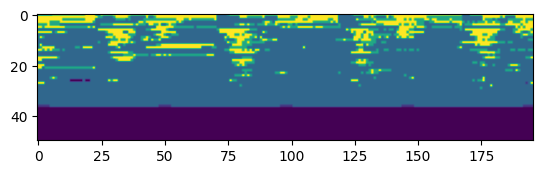

In [7]:

numeric_data = df2.reindex(list(time_columns), axis='columns').applymap(lambda x: {'available':0, 'few': 0.8, 'full': 2, 'na': -1, 'active': -1, 'closed': -0.5}[x]).to_numpy()
plt.imshow(numeric_data)
plt.show()